# Rede Bayesiana para diagnóstico da COVID-19 

## Importando as bibliotecas

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

## Processando os dados

In [6]:
# fonte: https://www.kaggle.com/einsteindata4u/covid19
data = pd.read_excel('covid19.xlsx')

In [7]:
data.shape

(5644, 111)

In [8]:
data

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Renomear colunas com nomes extensos
data.rename(columns= {'Patient age quantile': 'age_quantile',
                   'SARS-Cov-2 exam result': 'covid_19',
                   'Patient addmited to regular ward (1=yes, 0=no)': 'regular_ward', 
                   'Patient addmited to semi-intensive unit (1=yes, 0=no)': 'semi_intensive_care',
                   'Patient addmited to intensive care unit (1=yes, 0=no)': 'intensive_care',
                   'Influenza B, rapid test': 'influenza_B_rapid_test',
                   'Influenza A, rapid test': 'influenza_A_rapid_test'}, inplace = True)

# Transformar a variável categórica 
label_encoder = LabelEncoder()
data['covid_19'] = label_encoder.fit_transform(data['covid_19'])

# Remover os IDs dos pacientes
data.drop(columns = 'Patient ID', inplace = True)

# Remover a coluna onde mais de 95% dos dados são NaNs 
thresh = 0.05*data.shape[0]
data.dropna(axis= 1, thresh=thresh, inplace = True)

# Remover todas as colunas que têm apenas um valor
counts = data.nunique(axis=0)
index = counts[counts.values == 1].index
data.drop(columns = index, inplace = True)

# Considerar apenas as colunas q assumem no máximo 4 valores, com excessão de 4 V.As contínuas
kept_cols = [i for i in data if data[i].nunique()<=4]
kept_cols.extend(['Platelets','Red blood Cells','Lymphocytes','Leukocytes'])
data = data[kept_cols]

In [10]:
data.shape

(5644, 27)

In [11]:
data

,covid_19,regular_ward,semi_intensive_care,intensive_care,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,...,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,influenza_B_rapid_test,influenza_A_rapid_test,Strepto A,Platelets,Red blood Cells,Lymphocytes,Leukocytes
0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,...,not_detected,not_detected,not_detected,negative,negative,NaN,-0.517413,0.102004,0.318366,-0.094610
2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,...,not_detected,not_detected,not_detected,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
## Manipulando os dados faltantes
continuous_cols = [x for x in data.columns if data[x].dtypes == 'float64']
discrete_cols = [x for x in data.columns if (data[x].dtypes == 'O') | (data[x].dtypes == 'int64')]
print("Dados Contínuos: ", continuous_cols, "\nDados discretos:", discrete_cols)

#Remover os targets da listas das colunas onde os NaNs serão substituídos 
for i in ['covid_19', 'regular_ward', 'semi_intensive_care','intensive_care']:
    discrete_cols.remove(i) 

# Substituindo os NaNs dos dados contínuos pela média    
for i in continuous_cols:     
    data[i].fillna(data[i].median(), inplace=True) 
            
# Substituindo os NaNs dos dados discretos pelo inteiro '-999' 
for i in discrete_cols:     
    data[i].fillna('-999', inplace=True) 


Dados Contínuos:  ['Platelets', 'Red blood Cells', 'Lymphocytes', 'Leukocytes'] 
Dados discretos: ['regular_ward', 'semi_intensive_care', 'intensive_care', 'Respiratory Syncytial Virus', 'Influenza A', 'Influenza B', 'Parainfluenza 1', 'CoronavirusNL63', 'Rhinovirus/Enterovirus', 'Coronavirus HKU1', 'Parainfluenza 3', 'Chlamydophila pneumoniae', 'Adenovirus', 'Parainfluenza 4', 'Coronavirus229E', 'CoronavirusOC43', 'Inf A H1N1 2009', 'Bordetella pertussis', 'Metapneumovirus', 'influenza_B_rapid_test', 'influenza_A_rapid_test', 'Strepto A']


ValueError: list.remove(x): x not in list

In [ ]:
data

,covid_19,regular_ward,semi_intensive_care,intensive_care,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,...,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,influenza_B_rapid_test,influenza_A_rapid_test,Strepto A,Platelets,Red blood Cells,Lymphocytes,Leukocytes
0,0,0,0,0,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-0.121716,0.013852,-0.014267,-0.212879
1,0,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,...,not_detected,not_detected,not_detected,negative,negative,-999,-0.517413,0.102004,0.318366,-0.094610
2,0,0,0,0,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-0.121716,0.013852,-0.014267,-0.212879
3,0,0,0,0,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-0.121716,0.013852,-0.014267,-0.212879
4,0,0,0,0,not_detected,not_detected,not_detected,not_detected,not_detected,detected,...,not_detected,not_detected,not_detected,-999,-999,-999,-0.121716,0.013852,-0.014267,-0.212879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,1,0,0,0,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-0.121716,0.013852,-0.014267,-0.212879
5640,0,0,0,0,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-0.121716,0.013852,-0.014267,-0.212879
5641,0,0,0,0,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-0.121716,0.013852,-0.014267,-0.212879
5642,0,0,0,0,-999,-999,-999,-999,-999,-999,...,-999,-999,-999,-999,-999,-999,-0.121716,0.013852,-0.014267,-0.212879


In [ ]:
data.to_csv('template.csv', index = False)

## Criando a rede Bayesiana

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import matplotlib.pyplot as plt

## Rede Bayesiana 

In [ ]:
class BNEstimator():

    def __init__(self,
                 csv_template=None,
                 bn=None,
               mandatory_arcs=[],
               tabu_arcs=[],
               class_name = None,
               learning_method='greedy',
               prior='likelihood', 
               prior_weight=.5, 
               positif_label = None,
               threshold = .5,
               nb_classes = 2,               
               cut_points_percentiles  = list(100*np.linspace(0, 1,5)),
               bins=5):
        
        
        self.csv_template = csv_template
        self.mandatory_arcs = mandatory_arcs
        self.tabu_arcs = tabu_arcs
        self.class_name = class_name
        self.learning_method = learning_method
        self.prior = prior
        self.prior_weight = prior_weight
        self.positif_label = positif_label
        self.threshold = threshold
        self.nb_classes = nb_classes
        self.cut_points_percentiles = cut_points_percentiles
        self.bins = bins
        self.bn = bn
        

    def transform(self,d):

        template = gum.BayesNet()
        numeric_cols = list(d.select_dtypes(include=[np.number]).columns)
        categorical_cols = list(d.select_dtypes(include=[object]).columns)

        
        for col in numeric_cols:
            if d[col].value_counts().shape[0]>self.bins:
                x = d[col].values.flatten()
                x.sort()
                cut_points = np.percentile(x, self.cut_points_percentiles)
                d.loc[:,col]= np.digitize(x, cut_points, right=False)   
                del x
            template.add(gum.LabelizedVariable(col,col,list(map(str,d[col].value_counts().index)))) 
        for col in categorical_cols:
            if d[col].value_counts().shape[0]>self.bins:
                top = d[col].isin(d[col].value_counts().index[:self.bins])
                d.loc[~top, col] = "else_top_"+str(self.bins)

                del top
            template.add(gum.LabelizedVariable(col,col,list(map(str,d[col].value_counts().index))))
        return template,d

    def fit(self,data,name_file):

        learner = gum.BNLearner(name_file, data)

        
        for i in self.tabu_arcs: learner.addForbiddenArc(i[0],i[1])
        for i in self.mandatory_arcs :  learner.addMandatoryArc(i[0],i[1])

        if self.learning_method == 'greedy':learner.useGreedyHillClimbing()
        else: learner.useMIIC()

        if self.prior == "laplace":learner.useAprioriSmoothing(self.prior_weight)
        else:learner.useNoApriori()
            
        
        self.bn = learner.learnBN()
        self.bn = learner.learnParameters(self.bn.dag())        
        return self
    

In [ ]:
# Instanciar o estimador Bayesiano
estimator = BNEstimator('template.csv', class_name='covid_19',
                  tabu_arcs=[('influenza_B_rapid_test', 'covid_19')],
                  mandatory_arcs=[('Coronavirus HKU1','covid_19'),('Respiratory Syncytial Virus','covid_19')],
                  cut_points_percentiles = [5, 50, 95])

data = pd.read_csv('template.csv')
# Criar a topologia da rede
template,data = estimator.transform(data)

In [ ]:
# Divisão treino/teste
train,test = train_test_split(data,test_size=0.20, random_state=42)
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

# Treinar o modelo
estimator.fit(template,'train.csv')

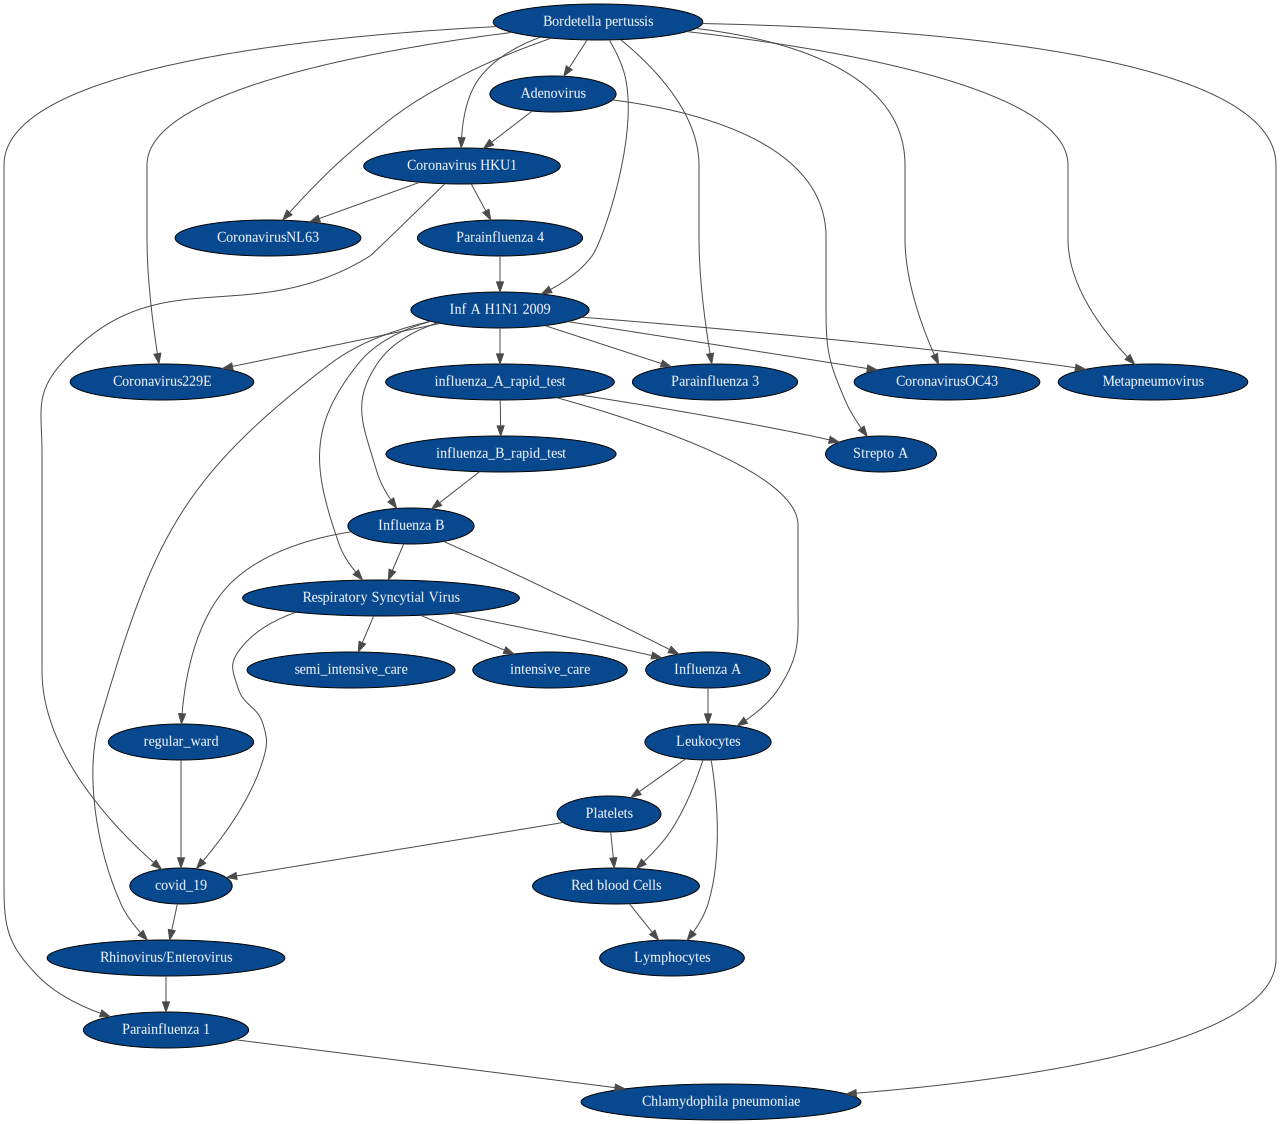

In [ ]:
gnb.showBN(estimator.bn,size=60,nodeColor={n:0.91 for n in estimator.bn.names()},cmap=plt.cm.get_cmap('Blues'))

In [ ]:
#capturar a tabela de probabilidade condicional
estimator.bn.cpt(estimator.bn.idFromName('covid_19'))

(pyAgrum.Potential<double>@0x55c5a3dfb050) 
                           ||  covid_19         |
Corona|regula|Platel|Respir||0        |1        |
------|------|------|------||---------|---------|
-999  |0     |2     |-999  || 0.9119  | 0.0881  |
not_de|0     |2     |-999  || 0.5000  | 0.5000  |
detect|0     |2     |-999  || 0.5000  | 0.5000  |
-999  |1     |2     |-999  || 0.4616  | 0.5384  |
not_de|1     |2     |-999  || 0.5000  | 0.5000  |
detect|1     |2     |-999  || 0.5000  | 0.5000  |
[...60 more line(s) ...]
-999  |0     |1     |detect|| 0.5000  | 0.5000  |
not_de|0     |1     |detect|| 0.5000  | 0.5000  |
detect|0     |1     |detect|| 0.5000  | 0.5000  |
-999  |1     |1     |detect|| 0.5000  | 0.5000  |
not_de|1     |1     |detect|| 0.5000  | 0.5000  |
detect|1     |1     |detect|| 0.5000  | 0.5000  |

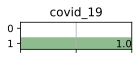

In [ ]:
test = pd.read_csv('test.csv')
row = test.loc[50,:]
evs = row.astype(str).to_dict() # P(Covid | row[0])


gnb.showPosterior(estimator.bn,
                 target='covid_19',
                 evs=evs)

In [ ]:
row

covid_19                              1
regular_ward                          0
semi_intensive_care                   0
intensive_care                        0
Respiratory Syncytial Virus        -999
Influenza A                        -999
Influenza B                        -999
Parainfluenza 1                    -999
CoronavirusNL63                    -999
Rhinovirus/Enterovirus             -999
Coronavirus HKU1                   -999
Parainfluenza 3                    -999
Chlamydophila pneumoniae           -999
Adenovirus                         -999
Parainfluenza 4                    -999
Coronavirus229E                    -999
CoronavirusOC43                    -999
Inf A H1N1 2009                    -999
Bordetella pertussis               -999
Metapneumovirus                    -999
influenza_B_rapid_test         negative
influenza_A_rapid_test         negative
Strepto A                      negative
Platelets                             2
Red blood Cells                       2


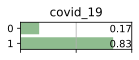

In [ ]:
evidence = {'Platelets': '3',
            'Respiratory Syncytial Virus': 'not_detected',
            'Coronavirus HKU1': 'not_detected',
            'regular_ward': 1
           }

gnb.showPosterior(estimator.bn,
                 target='covid_19',
                 evs=evidence)

Atividade(2.5): Realizar a classificação com a Rede Bayesiana:
<ol>
    <li> O método predict deve ser criado na classe BNEstimator(). Tal método deve receber um conjunto de teste e retornar a acurácia. </li> 
    <li> Testar um algoritmo de aprendizado diferente do GreedyHillClimbing, plotar a curva de aprendizado dos algoritmos (erro vs iterações) e comparar os resultados obtidos pela rede com os diferentes algoritmos. </li> 
    <li> Verificar uma nova hipótese: P(semi_intesive | evidencia). Nota: covid_19 deve se relacionar com a variável semi_intensiva. </li> 
</ol>